# share_plastic_fate.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_countries = pd.read_csv("data/Countries.csv")
data_countries

In [ ]:
data_share_plastic_fate = pd.read_csv("data/share-plastic-fate.csv")
data_share_plastic_fate = data_share_plastic_fate.rename(columns={'Share of waste recycled from total regional waste': 'share_waste_recycled'})

data_share_plastic_fate

In [ ]:
np.unique(data_countries["Year"])

In [ ]:
np.unique(data_share_plastic_fate["Year"])

In [17]:
np.unique(data_share_plastic_fate["Entity"])

array(['Americas (excl. USA)', 'Asia (excl. China and India)', 'China',
       'Europe', 'India', 'Middle East & North Africa', 'Oceania',
       'Sub-Saharan Africa', 'United States', 'World'], dtype=object)

In [ ]:
data_share_plastic_fate.loc[data_share_plastic_fate["Entity"] == "Americas (excl. USA)"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
sns.lineplot(x = "Year", y = "share_waste_recycled", hue = "Entity", data = data_share_plastic_fate)
plt.savefig("share_waste_recycled_on_year.png")

# Countries.csv

In [13]:
data_countries

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,Zimbabwe,ZWE,2018,7.319375,50.509980,19.039841,26.163973,3.415607e+10,4.670418,28.386297,...,15052184.0,390760.0,Africa,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
5102,Zimbabwe,ZWE,2019,9.819262,54.469350,22.837985,27.163459,2.183223e+10,3.659765,25.524111,...,15354608.0,390760.0,Africa,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
5103,Zimbabwe,ZWE,2020,8.772859,49.833418,15.666611,25.917014,2.150970e+10,3.425581,28.733547,...,15669666.0,390760.0,Africa,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486
5104,Zimbabwe,ZWE,2021,8.849899,49.833418,22.837985,25.411446,2.837124e+10,6.704907,30.901234,...,15993524.0,390760.0,Africa,7.209542e+09,8.767063e+09,6.479419e+09,1.902265e+09,-1.557521e+09,1773.920411,40.929276


In [16]:
np.unique(data_countries["Continent Name"])

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

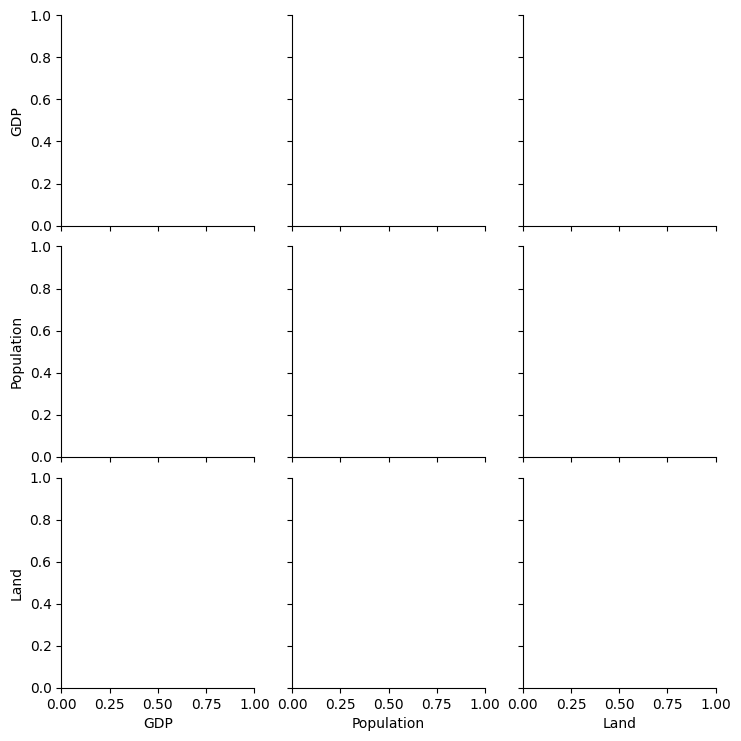

In [19]:
sns.PairGrid(data = data_countries, vars = ["GDP", "Population", "Land"])